In [1]:
import matplotlib.pyplot as plt;
import networkx as nx;
from xml.dom import minidom;

In [2]:
xml = minidom.parse('example1_out.xmi')
items = xml.getElementsByTagName('nodes')
nodes = [(
    item.getAttribute('label'), 
    item.getAttribute('shape') or "BOX",
    [(int(edge.getAttribute('target').split('.')[1]), edge.getAttribute('style') or "SOLID") for edge in item.getElementsByTagName('outEdges')]
) for item in items]
print(nodes)

[('my_server', 'BOX', [(2, 'DOTTED'), (4, 'DOTTED'), (6, 'DOTTED')]), ('my_db', 'BOX', [(5, 'DOTTED'), (7, 'DOTTED')]), ('256 GB', 'OVAL', []), ('my_cluster', 'BOX', [(1, 'SOLID'), (0, 'SOLID')]), ('LINUX', 'OVAL', []), ('16 GB', 'OVAL', []), ('4', 'OVAL', []), ('MYSQL', 'OVAL', []), ('Computing', 'BOX', [(0, 'SOLID')]), ('Storage', 'BOX', [(1, 'SOLID')]), ('Bogota', 'BOX', [(9, 'SOLID'), (8, 'SOLID')])]


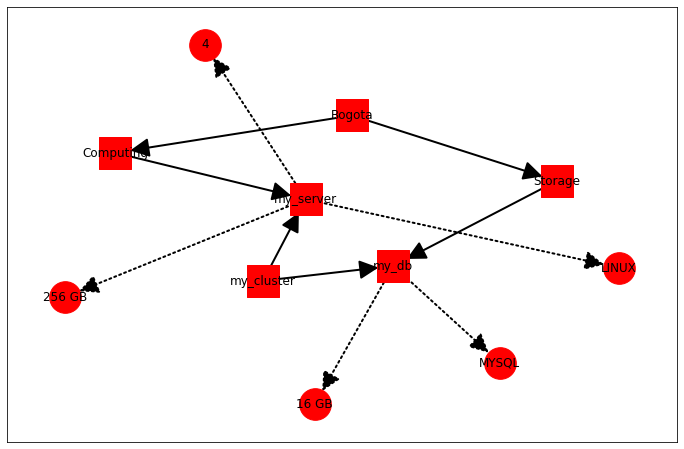

In [12]:
G = nx.DiGraph()
plt.figure(figsize=(12,8))
edges = [(src, e[0], e[1]) for src in range(0,len(nodes)) for e in nodes[src][2]]

for n in range(0,len(nodes)):
    G.add_node(n, s=('s' if nodes[n][1] == "BOX" else 'o'))

for e in range(0,len(edges)):
    G.add_edge(edges[e][0], edges[e][1], s=(edges[e][2].lower()))

pos = nx.layout.spring_layout(G, k=2, iterations=100)

for aShape in {'s', 'o'}:
    nx.draw_networkx_nodes(G,pos,node_shape = aShape, nodelist = [sNode[0] for sNode in filter(lambda x: x[1]["s"]==aShape,G.nodes(data = True))], node_color='r', node_size=1000)

nx.draw_networkx_labels(G, pos, { i:nodes[i][0] for i in range(0,len(nodes)) })

for aStyle in {'dotted', 'solid'}:
    nx.draw_networkx_edges(G,pos,arrowsize=40,min_target_margin=15,style=aStyle, width=2, edgelist = [(e[0],e[1]) for e in filter(lambda x: x[2]['s']==aStyle,G.edges(data = True))])

plt.show()